# Parse the data with the index information

In [14]:
import os
import numpy as np
import pandas as pd

def parse_data(filename, colnum, sep=':', savecsv=False):
    '''
    Args:
        filename (str): name of the data file
        colnum (int): number of the column with the data to plot
        sep (str): value separator in the file
        savecsv (bool): a flag to mark if a csv file should be save with parsed data
    '''
    
    # read the data from file
    df = pd.read_csv(filename, sep=sep, header=None, comment='#')
    
    # extract indices from the first column in the file
    ind = df.iloc[:, 0].str.split('_', expand=True)
    ind.rename(columns={2: 'ind_x', 3: 'ind_y'}, inplace=True)
    ind.loc[:, 'ind_x'] = ind['ind_x'].astype(int)
    ind.loc[:, 'ind_y'] = ind['ind_y'].astype(int)
    
    # merged the indices with the main df
    df = df.join(ind[['ind_x', 'ind_y']])
    
    # pivot the dataframe to 
    matrix = df.pivot(index='ind_x', columns='ind_y', values=colnum)

    if savecsv:
        mname = os.path.splitext(os.path.basename(filename))[0] + '_col-{0:d}'.format(colnum) + '.csv'
        np.savetxt(mname, matrix)

    return matrix
    

In [15]:
%matplotlib inline

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def heatmap(matrix, size=10, cmap='viridis', show_colorbar=True):
    '''
    Args:
        matrix (array_like): Matrix to be colormapped
        size (int): Size of the plot in inches
        cmap (str): name of the colormap to use
    '''

    plt.figure(figsize=(size, size))
    plt.pcolor(matrix, cmap=cmap)

    ax = plt.gca()
    ax.set_aspect('equal')
    
    if show_colorbar:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.2)
        plt.colorbar(cax=cax)

    plt.tight_layout()
    plt.show()

# parse the data 

In [17]:
m = parse_data('data/result_slice01.txt', colnum=1)

## show the data

In [18]:
m.head()

ind_y,3,4,5,6,7,8,9,10,11,12,...,51,52,53,54,55,56,57,58,59,60
ind_x,,,,,,,,,,,,,,,,,,,,,
3,65.14323,49.69298,48.79670,56.63807,47.02948,50.46613,78.54695,48.17240,43.33721,69.29522,...,339.49859,236.19234,87.30356,59.35334,74.26702,85.25973,78.98063,74.70566,51.93228,54.88132
4,69.85600,48.23067,49.13857,46.81142,50.08756,42.50936,83.23597,73.79040,44.87992,51.33915,...,356.65583,200.61550,128.84925,116.39241,89.90483,80.54440,52.29518,65.01838,62.95591,61.35586
5,76.40160,42.57160,50.38175,51.80404,47.59427,41.18479,50.88559,55.47304,50.64592,50.03333,...,515.90239,228.68634,550.69584,372.03552,121.54316,90.09829,69.64879,96.32019,63.56461,56.37973
6,58.80151,50.78167,54.44780,63.54956,56.18738,46.49468,49.04318,51.76220,63.22538,85.78638,...,697.16494,655.78041,484.59225,539.28921,443.63649,252.27457,129.93238,95.94847,55.74373,59.90149
7,61.91512,37.68067,35.86701,50.08186,84.66419,82.76149,71.15154,65.06230,56.12031,90.97828,...,614.41857,641.84395,646.67456,446.08255,588.31174,669.10054,180.65144,106.53503,69.29114,79.08854


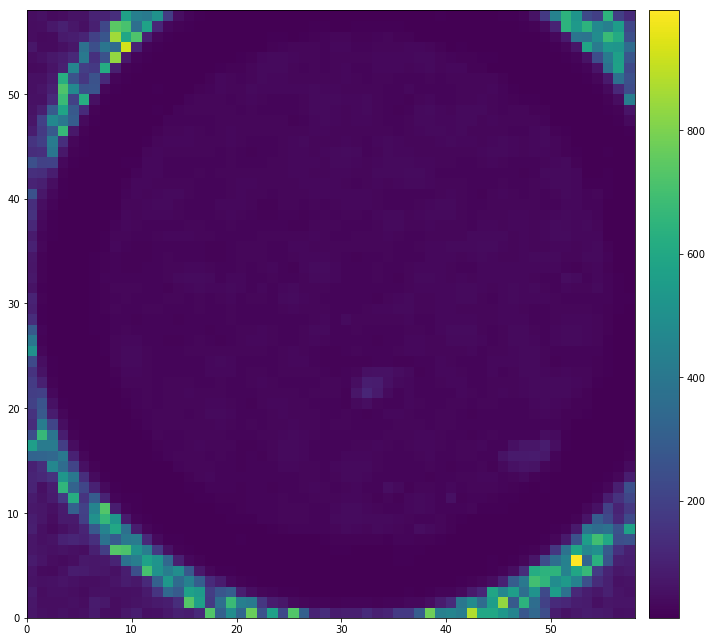

In [19]:
heatmap(m)

## different colum and colormap

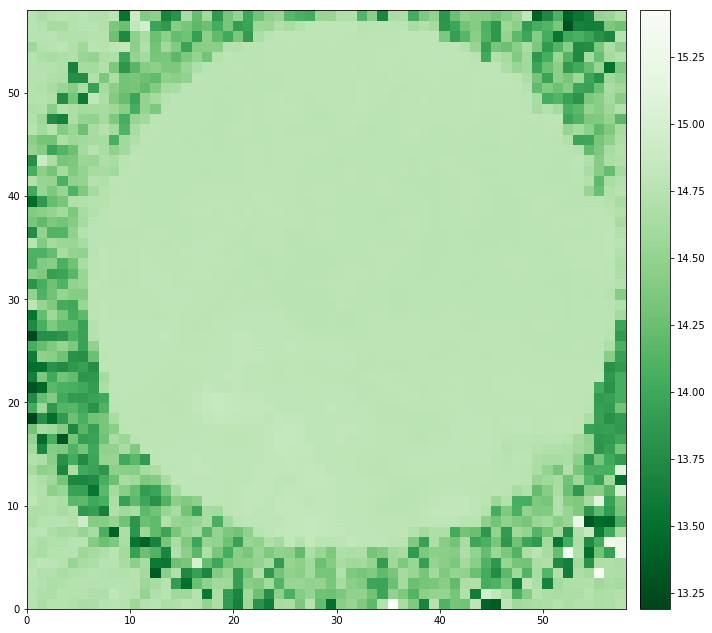

In [20]:
m = parse_data('data/result_slice01.txt', colnum=6)
heatmap(m, 10, cmap='Greens_r')

# same thing but using the heatmap method from seaborn

In [22]:
import seaborn as sns

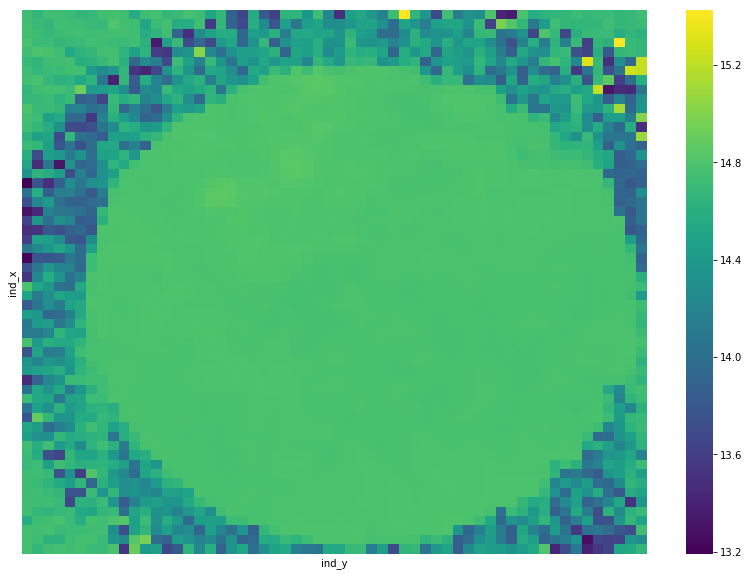

In [23]:
plt.figure(figsize=(14, 10))
sns.heatmap(m, cmap='viridis', xticklabels=False, yticklabels=False)